In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plot
import matplotlib.pyplot as plt

In [2]:
tDB = pd.read_csv('../Data/PJT002_train.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
tDB = tDB[['id', 'dt_of_fr', 'bldng_cnt', 'bldng_ar', 'ttl_ar', 'lnd_ar'
           , 'jmk', 'fr_sttn_dstnc', 'fr_wthr_fclt_dstnc'
           , 'mlt_us_yn', 'cctv_dstnc', 'cctv_in_100m'
           , 'fr_wthr_fclt_in_100m', 'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc'
           , 'ahsm_dstnc', 'no_tbc_zn_dstnc', 'bldng_cnt_in_50m', 'fr_yn']]

In [4]:
#tDB.info()

## Columns 

    ID :              아이디
    dt_of_fr :        화재발생일시
    fr_yn :           화재발생여부
    bldng_us :        건물용도
    bldng_archtctr :  건물구조
    bldng_cnt:        건물채수
    bldng_ar :        건물건축면적
    ttl_ar :          건물연면적(건물층별합계전체 면적)
    lnd_ar :          토지면적
    dt_of_arthrztn :  건물승인일자
    ttl_grnd_flr :    건물들의 지상 층수의 합
    ttl_dwn_fr :      건물들의 지하 층수의 합
    bldng_us_ :       건물용도분류명
    tmprtr :          온도(c)
    prcpttn :         강수량
    wnd_spd :         풍속
    wnd_drctn :       풍향
    hmdt :            습도
    ele_engry_us_201401 : 전기 에너지 사용량(2014월1월)
    gas_engry_us_201401 : 가스 에너지 사용량(2014월1월)

    lw_13101010 : 복도,계단,출입구의 성능 유지여부(0~5)
    lw_13101110 : 옥상광장의 피난성능 유지여부(0~5)
    lw_13101210 : 방화문, 방화셔터 등의 성능 유지여부(0~5)
    lw_13101211 : 방화구획 적합 여부(0~5)
    lw_13101310 : 경계벽 및 칸막이벽의 변경 등 방화성능 유지여부(0~5)
    lw_13101410 : 배연설비의 성능 유지여부(0~5)
    lw_13111010 : 내화구조의 성능 유지여부(0~5)
    lw_13111110 : 방화벽의 성능 유지여부(0~5)
    lw_13121010 : 외벽의 성능 유지여부(0~5)
    lw_13121011 : 창호의 성능 유지여부(0~5)
    lw_13131010 : 내부마감의 방화성능 유지여부(0~5)
    lw_13131110 : 외부마감의 노후화 및 마감재 탈락 여부(0~5)
    lw_13141010 : 지하층의 소방설비 성능 유지여부(0~5)
    lw_13141011 : 지하층 피난구,피난계단의 성능 유지여부(0~5)

    jmk:          지적상 지목
    rgnl_ar_nm :  용도지역지구명
    rgnl_ar_nm2 : 용도지역지구명2
    lnd_us_sttn_nm : 토지이용상황명
    rd_sd_nm :    도로측면명
    emd_nm :      행정구역명
    hm_cnt :      행정구역 인구
    fr_sttn_dstnc_119 : 안전센터와의 거리
    bldng_ar_prc : 단위 면적당 건물 가격
    fr_wthr_fclt_dstnc : 소방용수시설(소화전 등)과의 거리
    fr_mn_cnt : 관할 소방서 인원
    mlt_us_yn : 다중이용시설 포함여부
    cctv_dstnc : 공공 CCTV와의 최소 거리
    cctv_in_100m : 100m 이내 공공 CCTV
    fr_wthr_fclt_in_100m : 100m 이내 소방용수 시설 수
    tbcco_trl_str_dstnc : 담배 소매점과의 최소 거리
    sft_emrgnc_bll_dstnc : 안전 비상벨과의 최소 거리
    ahsm_dstnc : 자동 심장 충격기와의 최소 거리
    no_tbc_zn_dstnc : 금연구역과의 최소 거리
    bldng_cnt_in_50m : 반경 50M 이내의 건물 수

In [5]:
#tDB.info()

In [6]:
tDB['year']= tDB['dt_of_fr'].apply(lambda x : str(x).split('-')[0]) 
tDB['month']= tDB['dt_of_fr'].apply(lambda x: str(x).split('-')[1])
tDB['date_time']= tDB['dt_of_fr'].apply(lambda x : str(x).split('-')[2])
tDB['date'] = tDB['date_time'].apply(lambda x : x.split(' ')[0])
tDB['time'] = tDB['date_time'].apply(lambda x : x.split(' ')[1])

# Yearly 비교


In [7]:
y_count = tDB.groupby('year').count().reset_index()[['year', 'id']]
y_count = y_count.rename(columns = {'id':'count'})
y_count

,year,count
0,2014,11724
1,2015,12036
2,2016,11885
3,2017,11801
4,2018,11753


In [8]:
%matplotlib inline

(11000, 12500)

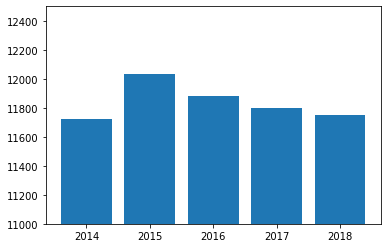

In [9]:
plt.bar(x = 'year', height='count', data = y_count)
plt.ylim(11000, 12500)


---

# Monthly 비교

In [10]:
m_count = tDB.groupby('month').count().reset_index()[['month', 'id']]
m_count = m_count.rename(columns = {'id':'count'})
m_count

,month,count
0,01,5080
1,02,5056
2,03,5082
3,04,4993
4,05,4902
5,06,4788
6,07,4781
7,08,4802
8,09,4711
9,10,4978


(4400, 5500)

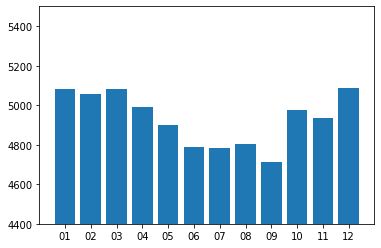

In [11]:
plt.bar(x = 'month', height='count', data = m_count)
plt.ylim(4400, 5500)

---
# 날짜별 비교
 
 > 요일별 비교가 더 나을 듯

In [12]:
d_count = tDB.groupby('date').count().reset_index()[['date', 'id']]
d_count = d_count.rename(columns = {'id':'count'})

<BarContainer object of 31 artists>

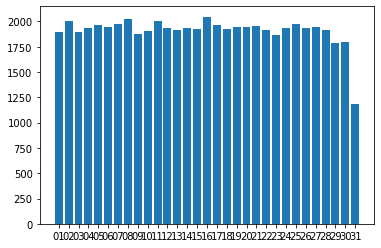

In [13]:
plt.bar(x = 'date', height='count', data = d_count)

---
# 시간대별 비교

In [25]:
a = tDB['time'].reset_index()
a['time'] = a['time'].apply(lambda x : x[:2])

0        02
1        17
2        12
3        02
4        16
         ..
59194    10
59195    17
59196    08
59197    03
59198    21
Name: time, Length: 59199, dtype: object

In [27]:
time_line = sorted(a['time'])

(2000, 2750)

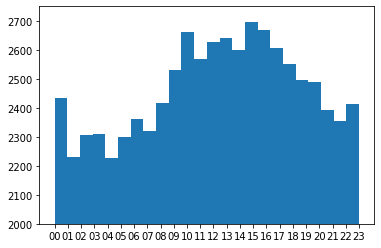

In [31]:
plt.hist(time_line, bins = 24)
plt.ylim(2000, 2750)